In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\Dataset\Files-main\Files-main\titanic_train.csv")
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


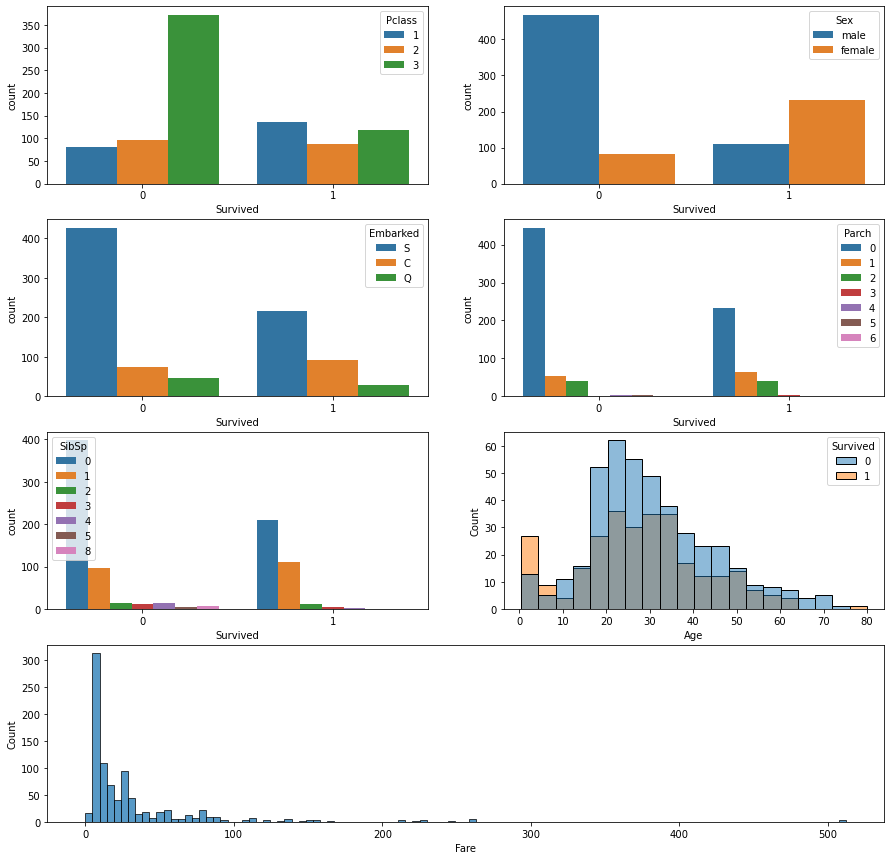

In [6]:
fig, axs = plt.subplots(4,2, figsize=(15,15))

sns.countplot(ax=axs[0,0], x="Survived",hue="Pclass",data=df)
sns.countplot(ax=axs[0,1], x="Survived",hue="Sex",data=df)
sns.countplot(ax=axs[1,0], x="Survived",hue="Embarked",data=df)
sns.countplot(ax=axs[1,1], x="Survived",hue="Parch",data=df)
sns.countplot(ax=axs[2,0], x="Survived",hue="SibSp",data=df)
sns.histplot(ax=axs[2,1], x="Age", hue="Survived", data=df)

ax1=plt.subplot(414)
sns.histplot(ax=ax1, x="Fare", data=df)

plt.show()

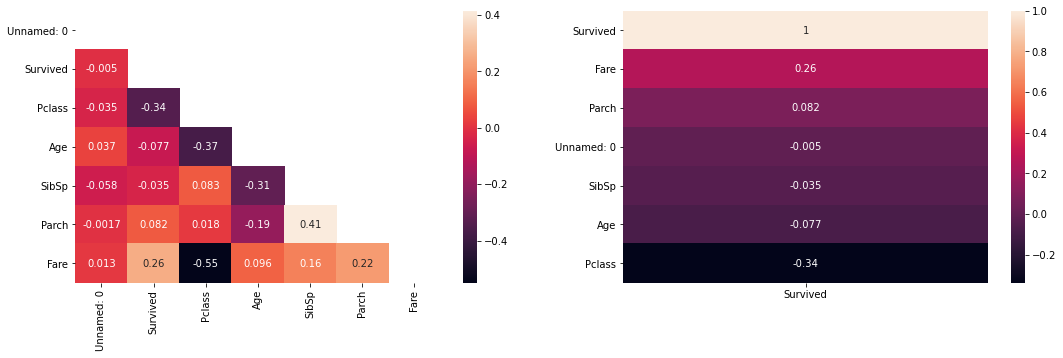

In [7]:
fig, axs = plt.subplots(1,2, figsize=(18,5))

mask = np.triu(np.ones_like(df.drop(columns=["PassengerId","Name"]).corr(), dtype=np.bool))
sns.heatmap(df.drop(columns=["PassengerId","Name"]).corr(), annot=True, mask=mask, ax=axs[0])
sns.heatmap(df.drop(columns=["PassengerId","Name"]).corr()[['Survived']].sort_values(by='Survived', ascending=False), annot=True, ax=axs[1])

plt.show()

In [9]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna('S', inplace=True)



X_train=df.drop(columns=['Survived','Name','Cabin','Ticket'])

Y_train=df['Survived']
X_train

,Unnamed: 0,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,3,male,22.0,1,0,7.2500,S
1,1,2,1,female,38.0,1,0,71.2833,C
2,2,3,3,female,26.0,0,0,7.9250,S
3,3,4,1,female,35.0,1,0,53.1000,S
4,4,5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,886,887,2,male,27.0,0,0,13.0000,S
887,887,888,1,female,19.0,0,0,30.0000,S
888,888,889,3,female,28.0,1,2,23.4500,S
889,889,890,1,male,26.0,0,0,30.0000,C


In [10]:
le=preprocessing.LabelEncoder()

X_train[['Sex']]=le.fit_transform(X_train[['Sex']])

X_train['Embarked'][X_train['Embarked'].notnull()]=le.fit_transform(X_train[['Embarked']][X_train['Embarked'].notnull()])


X_train

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-10-9799b75c4c9a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Embarked'][X_train['Embarked'].notnull()]=le.fit_transform(X_train[['Embarked']][X_train['Embarked'].notnull()])


,Unnamed: 0,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,3,1,22.0,1,0,7.2500,2
1,1,2,1,0,38.0,1,0,71.2833,0
2,2,3,3,0,26.0,0,0,7.9250,2
3,3,4,1,0,35.0,1,0,53.1000,2
4,4,5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,886,887,2,1,27.0,0,0,13.0000,2
887,887,888,1,0,19.0,0,0,30.0000,2
888,888,889,3,0,28.0,1,2,23.4500,2
889,889,890,1,1,26.0,0,0,30.0000,0


# decision tree

In [20]:
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.3)

clf=DecisionTreeClassifier()
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print("F1:",metrics.f1_score(test_y, pred_y))



Accuracy: 0.7014925373134329
F1: 0.607843137254902


# Random Forest¶

In [22]:
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.3)

clf=RandomForestClassifier(n_estimators=30)
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print("F1:",metrics.f1_score(test_y, pred_y))

Accuracy: 0.8395522388059702
F1: 0.7700534759358288


# naive bayes gaussian

In [25]:
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.3)

clf=GaussianNB()
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print("F1:",metrics.f1_score(test_y, pred_y))


Accuracy: 0.7835820895522388
F1: 0.7238095238095238


# LogisticRegression with lasso


In [26]:
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.3)

clf=LogisticRegression(penalty="l1",solver='liblinear', random_state=1)
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print("F1:",metrics.f1_score(test_y, pred_y))

Accuracy: 0.7947761194029851
F1: 0.7027027027027027


# LogisticRegression with ridge

In [27]:
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.3)

clf=LogisticRegression(penalty="l2",solver='liblinear', random_state=1)
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print("F1:",metrics.f1_score(test_y, pred_y))

Accuracy: 0.7761194029850746
F1: 0.702970297029703


# Gradient Boosting

In [28]:
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.3)

clf=GradientBoostingClassifier()
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)

print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print("F1:",metrics.f1_score(test_y, pred_y))

Accuracy: 0.8171641791044776
F1: 0.7461139896373058
